In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Numerical data

  * age
  * creatinine_phosphokinase
  * ejection_fraction
  * platelets
  * serum_creatinine
  * serum_sodium
  * time

### Categorical data

* Sex - Gender of patient Male = 1, Female =0
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

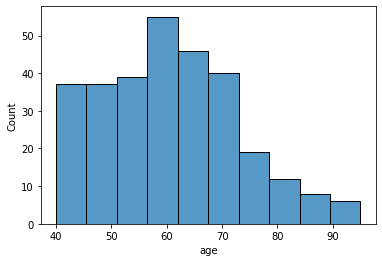

In [8]:
sns.histplot(data['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

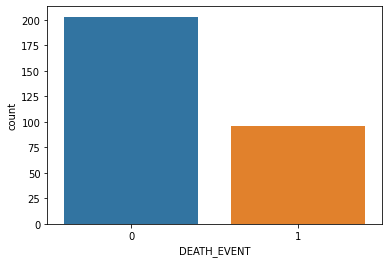

In [9]:
sns.countplot(data['DEATH_EVENT'])

the data is biased

In [10]:
import matplotlib.pyplot as plt

In [11]:
data['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

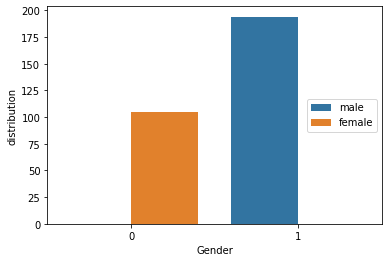

In [12]:
ax=sns.barplot(x=data['sex'].value_counts().index,y=data['sex'].value_counts().values,hue=['male','female'])
plt.legend(loc=5)
plt.xlabel('Gender')
plt.ylabel('distribution')
plt.show()

In [13]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


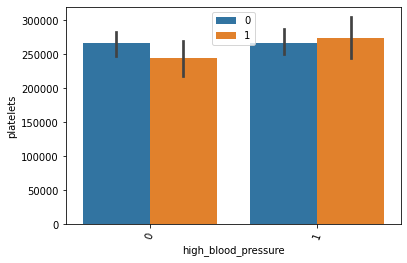

In [14]:
ax=sns.barplot(x='high_blood_pressure',y='platelets',hue='DEATH_EVENT',data=data)
plt.legend(loc=9)
plt.xticks(rotation=70)
plt.show()

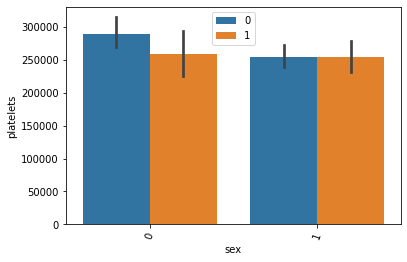

In [15]:
ax=sns.barplot(x='sex',y='platelets',hue='DEATH_EVENT',data=data)
plt.legend(loc=9)
plt.xticks(rotation=70)
plt.show()

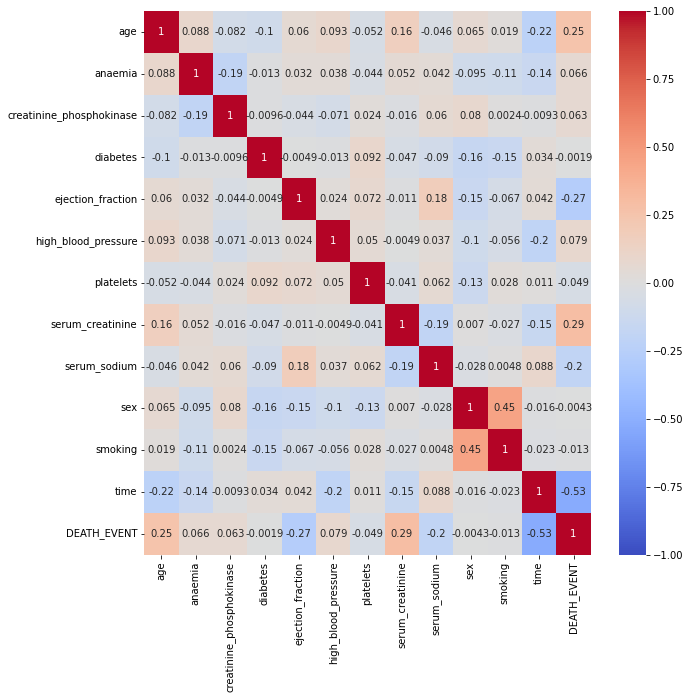

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True);

<AxesSubplot:xlabel='age', ylabel='Density'>

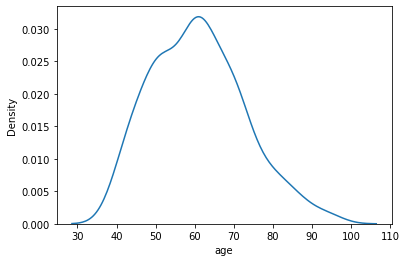

In [17]:
sns.kdeplot(data['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

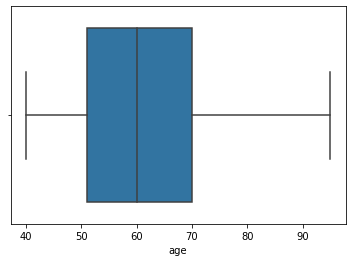

In [18]:
sns.boxplot(data['age'])


<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Density'>

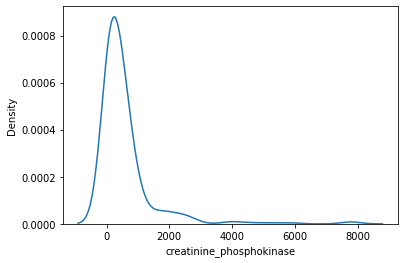

In [19]:
sns.kdeplot(data['creatinine_phosphokinase'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='creatinine_phosphokinase'>

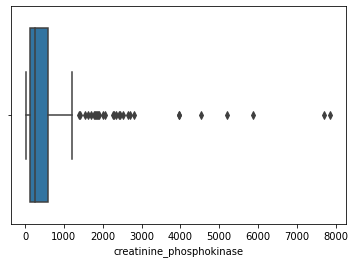

In [20]:
sns.boxplot(data['creatinine_phosphokinase'])


<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

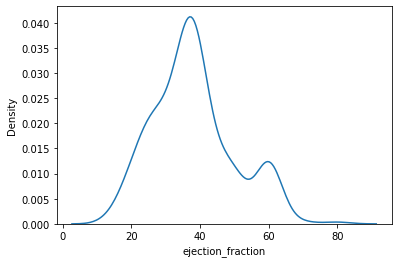

In [21]:
sns.kdeplot(data['ejection_fraction'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ejection_fraction'>

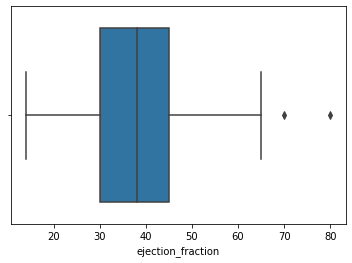

In [22]:
sns.boxplot(data['ejection_fraction'])


<AxesSubplot:xlabel='platelets', ylabel='Density'>

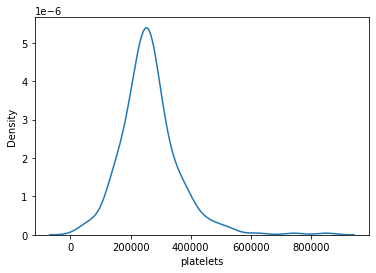

In [23]:
sns.kdeplot(data['platelets'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='platelets'>

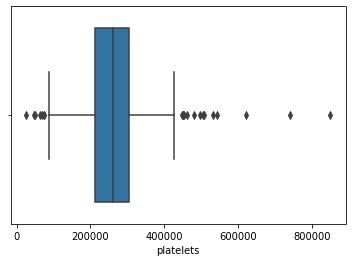

In [24]:
sns.boxplot(data['platelets'])


<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

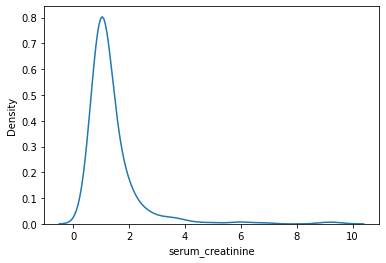

In [25]:
sns.kdeplot(data['serum_creatinine'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='serum_creatinine'>

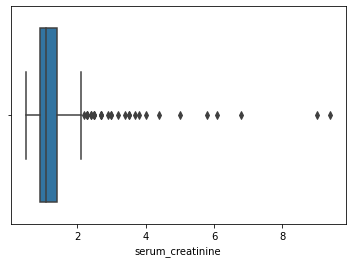

In [26]:
sns.boxplot(data['serum_creatinine'])


<AxesSubplot:xlabel='serum_sodium', ylabel='Density'>

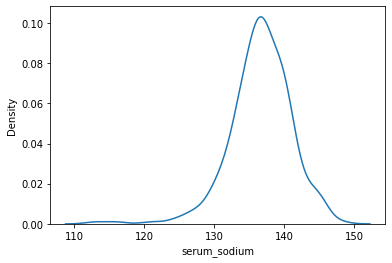

In [27]:
sns.kdeplot(data['serum_sodium'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='serum_sodium'>

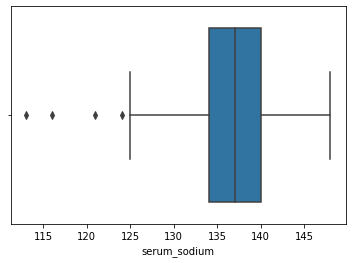

In [28]:
sns.boxplot(data['serum_sodium'])

<AxesSubplot:xlabel='time', ylabel='Density'>

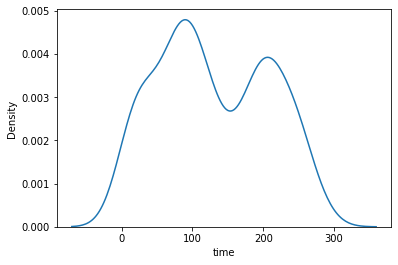

In [29]:
sns.kdeplot(data['time'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='time'>

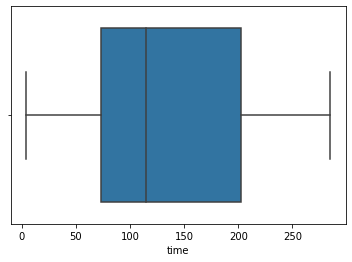

In [30]:
sns.boxplot(data['time'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='time'>

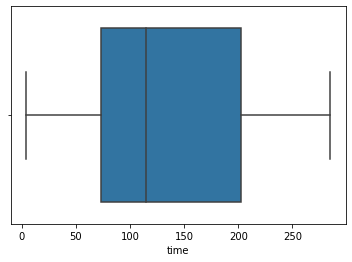

In [31]:
sns.boxplot(data['time'])

### There are outliers present, needs to treat them

In [32]:
x=data.copy()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'anaemia'),
  Text(2, 0, 'creatinine_phosphokinase'),
  Text(3, 0, 'diabetes'),
  Text(4, 0, 'ejection_fraction'),
  Text(5, 0, 'high_blood_pressure'),
  Text(6, 0, 'platelets'),
  Text(7, 0, 'serum_creatinine'),
  Text(8, 0, 'serum_sodium'),
  Text(9, 0, 'sex'),
  Text(10, 0, 'smoking'),
  Text(11, 0, 'time')])

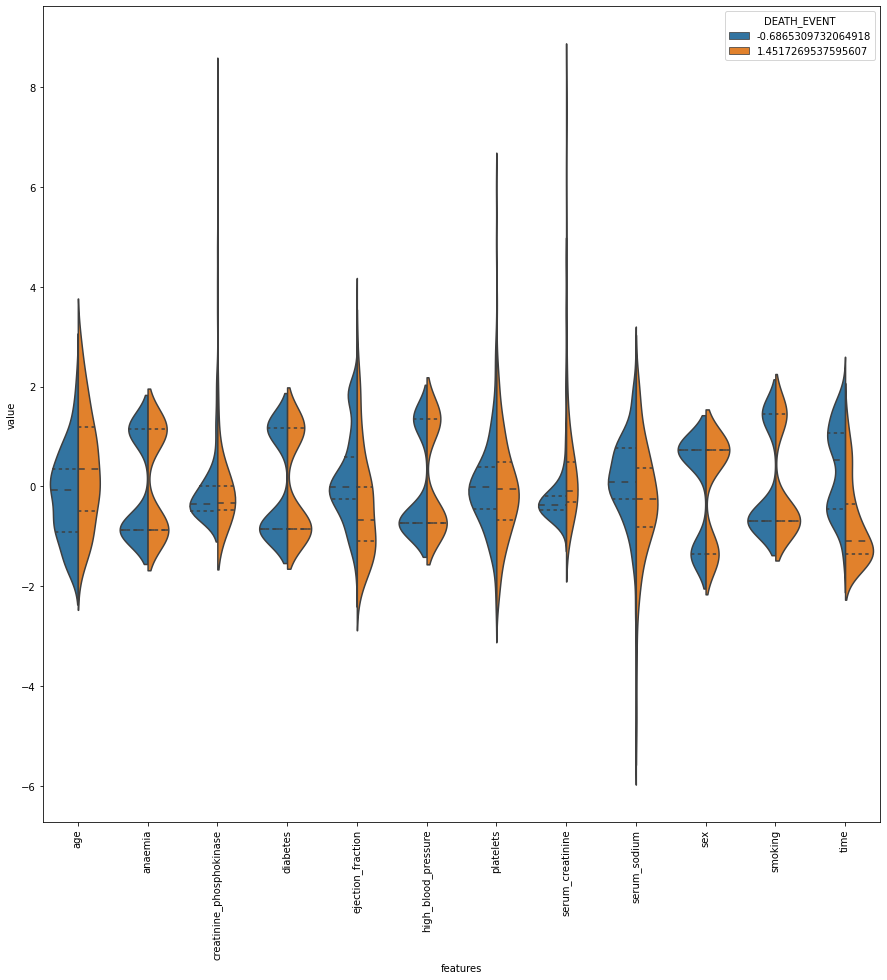

In [33]:
data1=x
data_n_2=(data1-data1.mean())/(data1.std())
# standardization
data1=data_n_2
data1=pd.melt(data1,id_vars='DEATH_EVENT',var_name='features',value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x='features',y='value',hue='DEATH_EVENT',data=data1,split=True,inner='quart')
plt.xticks(rotation=90)

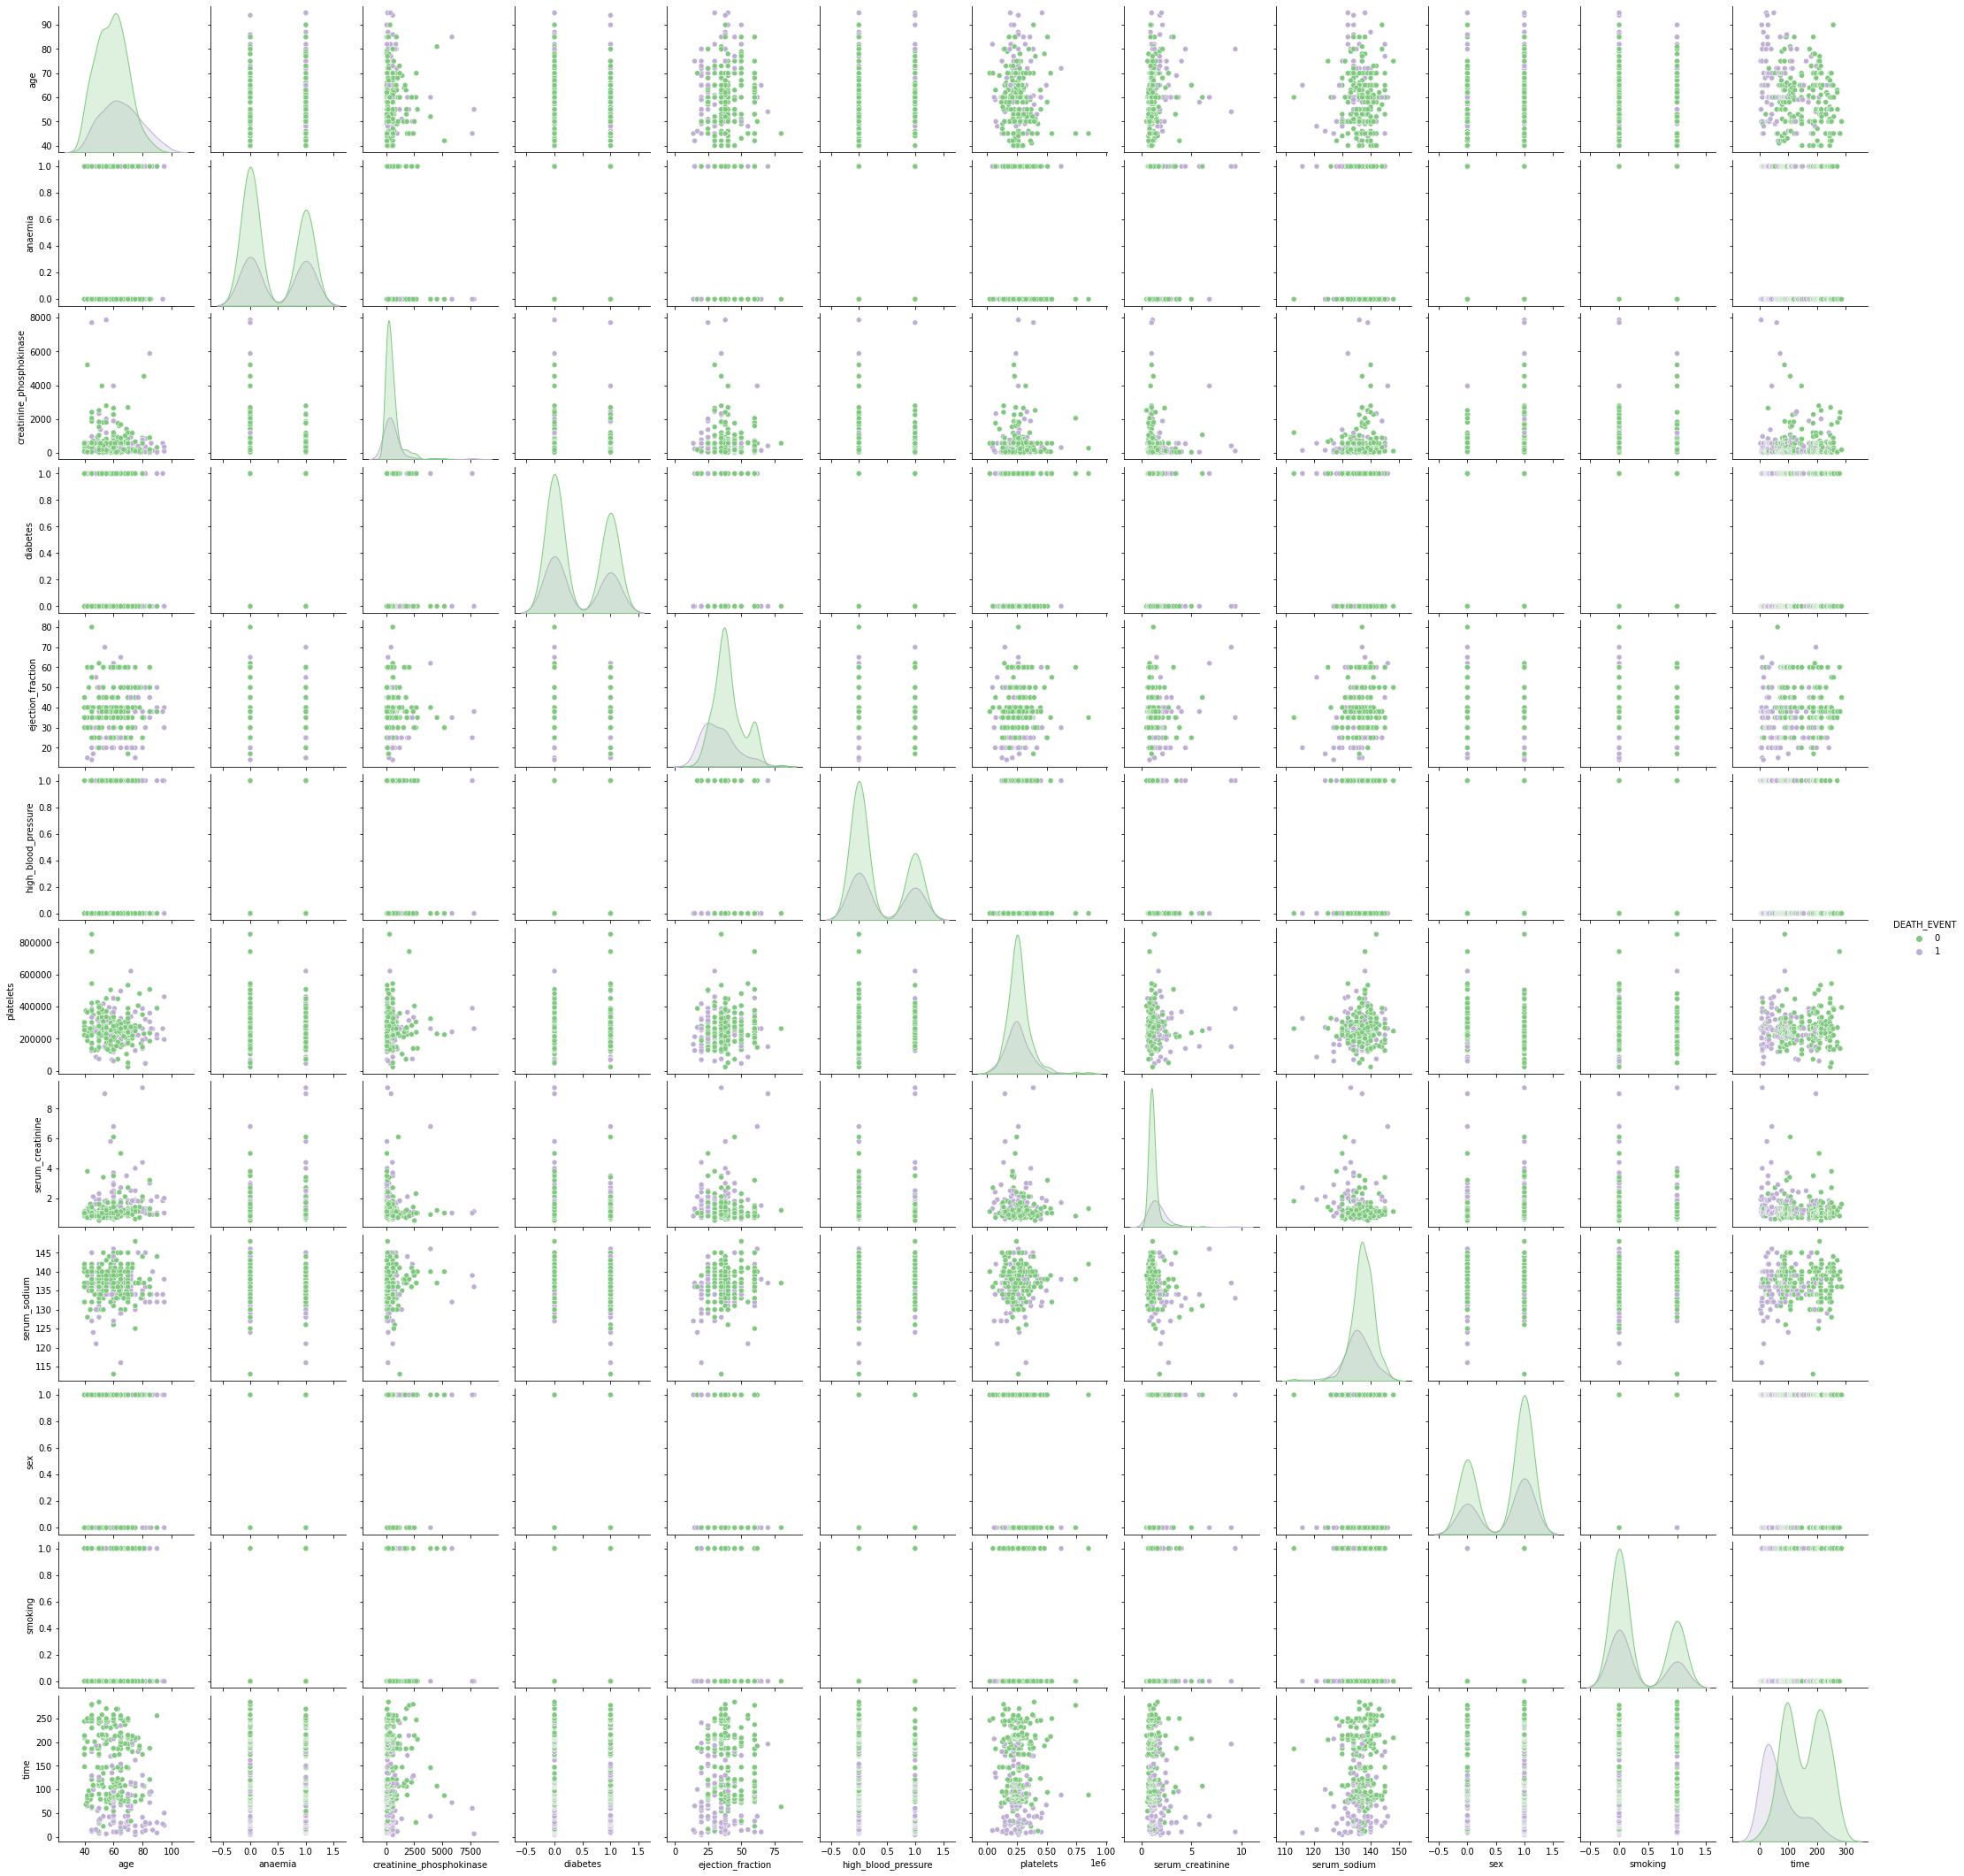

In [34]:
sns.pairplot(data,hue='DEATH_EVENT',palette='Accent')

In [35]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [36]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [37]:
df=data.copy()
for i in ["age", "creatinine_phosphokinase",'ejection_fraction','platelets','serum_creatinine','serum_sodium','time']:
    #data_n_2=(data1-data1.mean())/(data1.std())
    df[i]=(df[[i]]-df[[i]].mean())/(df[[i]].std())

In [38]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.190949,0,0.000165,0,-1.527998,1,1.678834e-02,0.489237,-1.501519,1,0,-1.626775,1
1,-0.490457,0,7.502063,0,-0.007065,0,7.523047e-09,-0.284076,-0.141739,1,0,-1.601007,1
2,0.350246,0,-0.449186,0,-1.527998,0,-1.036336e+00,-0.090748,-1.728149,1,1,-1.588122,1
3,-0.910808,1,-0.485257,0,-1.527998,0,-5.455595e-01,0.489237,0.084892,1,0,-1.588122,1
4,0.350246,1,-0.434757,1,-1.527998,0,6.507077e-01,1.262550,-4.674340,0,0,-1.575238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098035,0,-0.536789,1,-0.007065,1,-1.107907e+00,-0.284076,1.444672,1,1,1.800432,0
295,-0.490457,0,1.276075,0,-0.007065,0,6.791087e-02,-0.187412,0.538152,0,0,1.813317,0
296,-1.331160,0,1.523425,1,1.851853,0,4.893878e+00,-0.574068,0.311522,0,0,1.903506,0
297,-1.331160,0,1.887234,0,-0.007065,0,-1.261275e+00,0.005916,0.764782,1,1,1.929275,0


<AxesSubplot:>

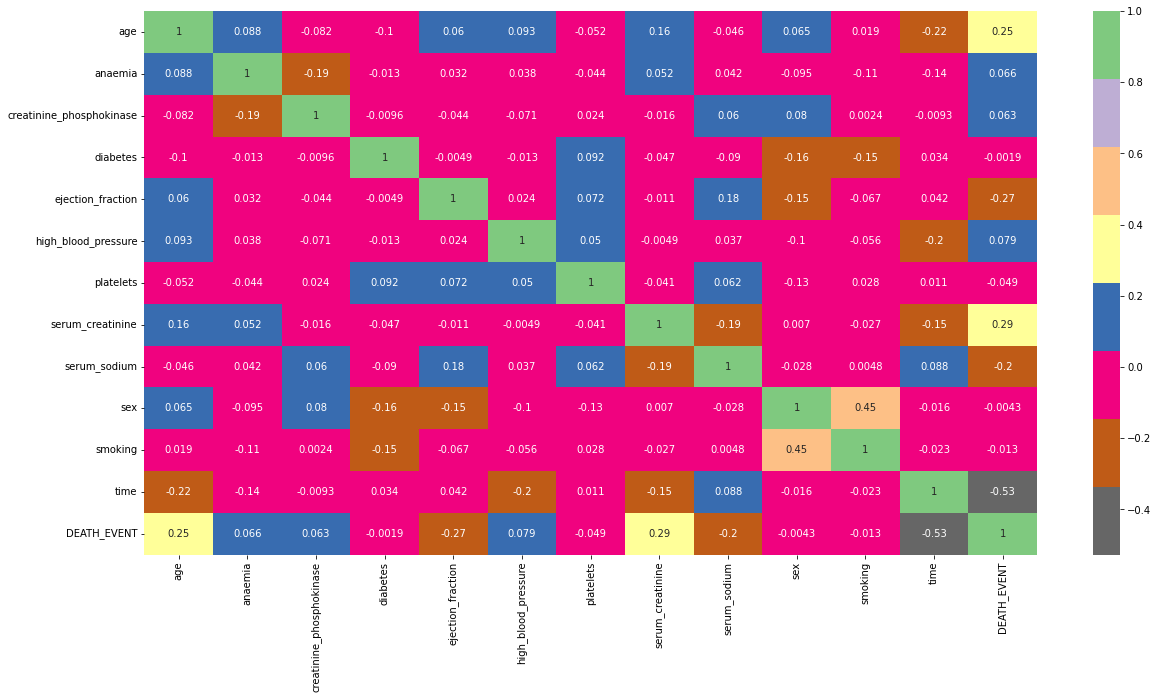

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Accent_r')

### Feature Selection


In [40]:
features=['age','time','ejection_fraction','serum_creatinine','serum_sodium']
df2=df[features]
y=data["DEATH_EVENT"]

In [41]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [42]:

x_train,x_test,y_train,y_test = train_test_split(df2,y, test_size=0.2, random_state=2)

### Modeling

In [43]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [44]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)

In [45]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, log_reg_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.87      0.76      0.81        17

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.90      0.90      0.90        60



In [46]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

<Figure size 432x288 with 0 Axes>

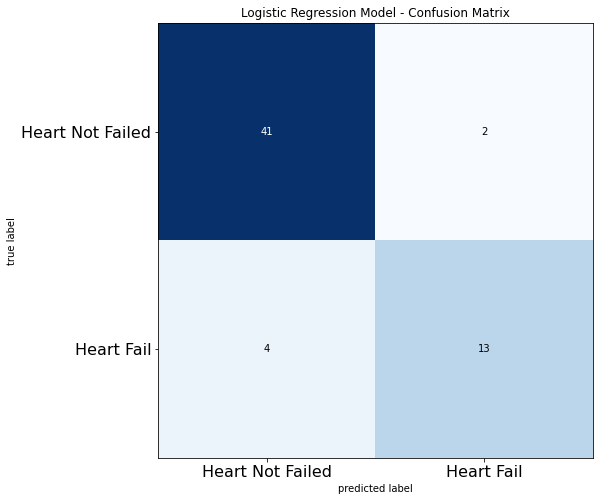

In [47]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [48]:
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, sv_clf_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.76      0.76      0.76        17

    accuracy                           0.87        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.87      0.87      0.87        60



<Figure size 432x288 with 0 Axes>

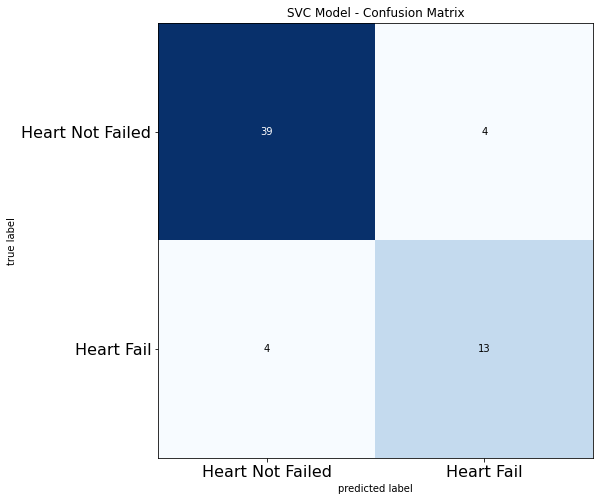

In [49]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [50]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, kn_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        43
           1       0.75      0.53      0.62        17

    accuracy                           0.82        60
   macro avg       0.79      0.73      0.75        60
weighted avg       0.81      0.82      0.81        60



<Figure size 432x288 with 0 Axes>

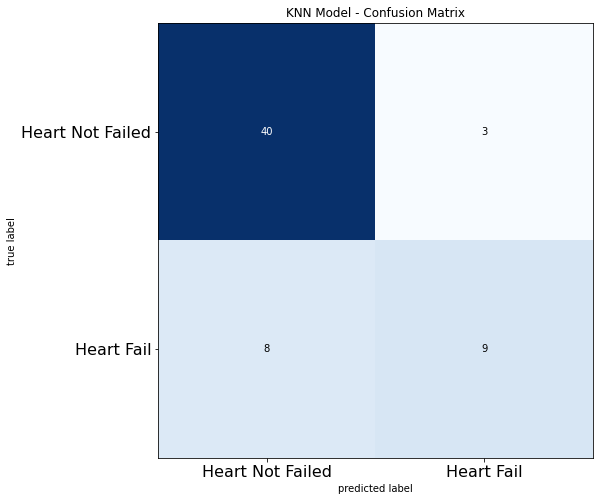

In [51]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [52]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, dt_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.74      0.82      0.78        17

    accuracy                           0.87        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.87      0.87      0.87        60



<Figure size 432x288 with 0 Axes>

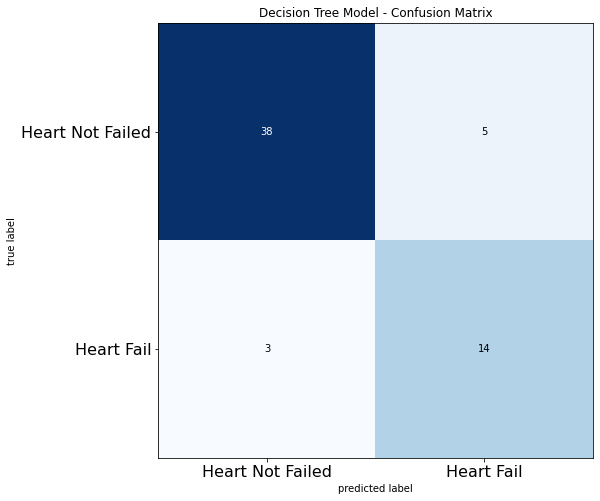

In [53]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



<Figure size 432x288 with 0 Axes>

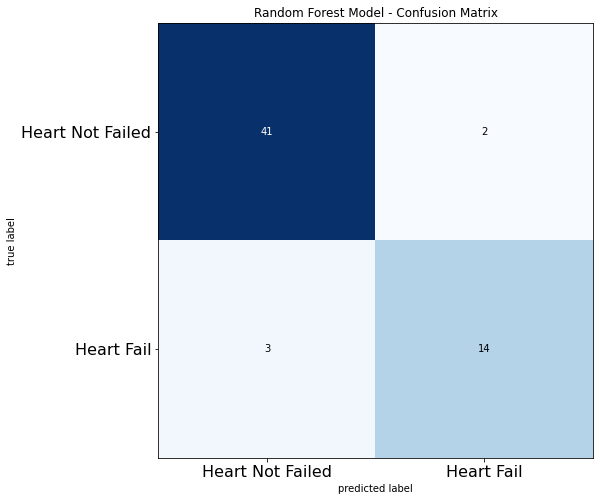

In [54]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, r_pred, target_names=target_names))
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



<Figure size 432x288 with 0 Axes>

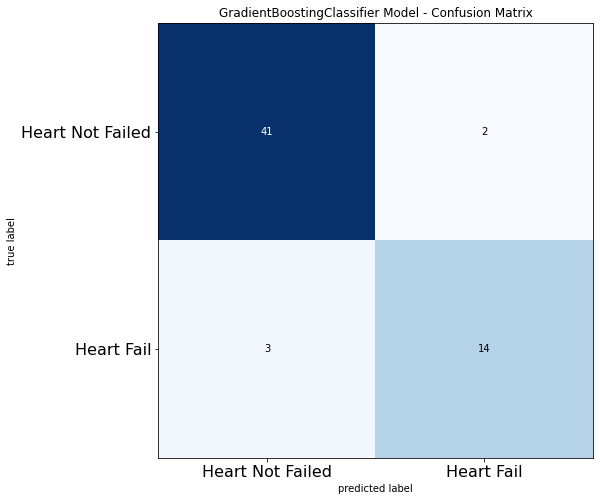

In [55]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, gradientboost_pred, target_names=target_names))
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("GradientBoostingClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

[18:51:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

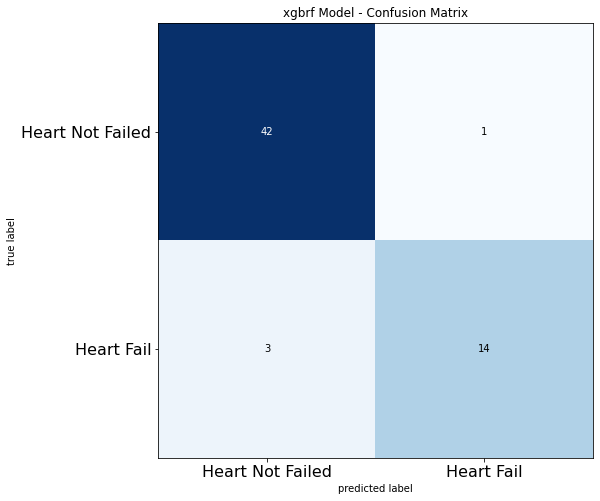

In [56]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier()
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, xgb_pred, target_names=target_names))
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("xgbrf Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Feature Engineering using Recursive Feature Elemination Technique

In [57]:
from sklearn.feature_selection import RFE

In [58]:
df2=df.copy()
df2.drop('DEATH_EVENT',axis=1,inplace=True)
y=data["DEATH_EVENT"]

x_train,x_test,y_train,y_test = train_test_split(df2,y, test_size=0.2, random_state=2)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.93      0.82      0.87        17

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60



<Figure size 432x288 with 0 Axes>

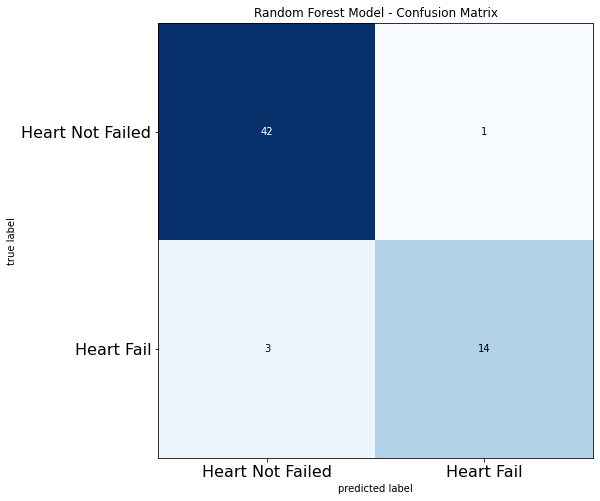

In [59]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
target_names = ['0', '1']
print(classification_report(y_test, r_pred, target_names=target_names))
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [60]:
rfe_lr=RFE(estimator=r_clf)
rfe_lr.fit(x_train,y_train)
rfe_lr.score(x_test,y_test)

0.9166666666666666

In [61]:
lr_mask=rfe_lr.support_

In [62]:
lr_mask

array([ True, False,  True, False,  True, False,  True,  True, False,
       False, False,  True])

In [63]:
x_train.columns[rfe_lr.support_]

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.88      0.82      0.85        17

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



<Figure size 432x288 with 0 Axes>

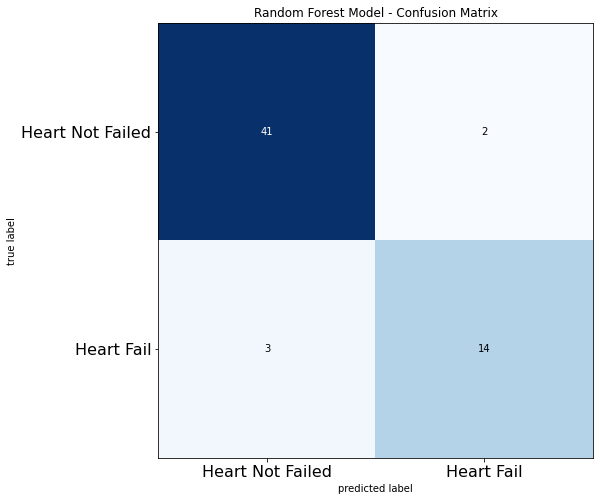

In [64]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time']], y_train)
r_pred = r_clf.predict(x_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time']])
target_names = ['0', '1']
print(classification_report(y_test, r_pred, target_names=target_names))
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# However we are not getting good results after feature engineering. 